In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

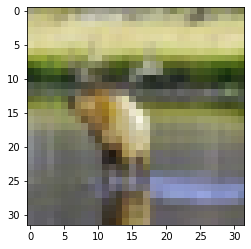

In [6]:
plt.imshow(x_train[89])

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train/255

In [9]:
x_test = x_test/255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, 10)

In [13]:
y_cat_test = to_categorical(y_test, 10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

# CONVOLUTIONAL LAYER 
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# CONVOLUTIONAL LAYER 
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)


In [19]:
model.fit(x_train, y_cat_train, epochs=25,
          validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Epoch 1/25
1563/1563 [==============================] - 39s 4ms/step - loss: 1.7136 - accuracy: 0.3744 - val_loss: 1.2693 - val_accuracy: 0.5525
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2114 - accuracy: 0.5685 - val_loss: 1.1147 - val_accuracy: 0.6079
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0536 - accuracy: 0.6278 - val_loss: 1.0269 - val_accuracy: 0.6428
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9131 - accuracy: 0.6817 - val_loss: 1.0208 - val_accuracy: 0.6484
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8212 - accuracy: 0.7124 - val_loss: 0.9575 - val_accuracy: 0.6748
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7234 - accuracy: 0.7478 - val_loss: 0.9620 - val_accuracy: 0.6750
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6666 - accuracy: 0.7635 - val_loss: 0.9718 - val_accuracy

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.504926,0.45722,1.269277,0.5525
1,1.172132,0.58472,1.114719,0.6079
2,1.029781,0.63856,1.026857,0.6428
3,0.915903,0.67920,1.020755,0.6484
4,0.829862,0.70872,0.957532,0.6748
5,0.742277,0.74136,0.961988,0.6750
6,0.677219,0.76216,0.971836,0.6808


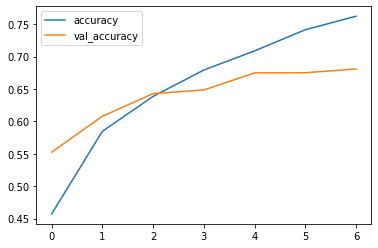

In [27]:
metrics[['accuracy', 'val_accuracy']].plot()

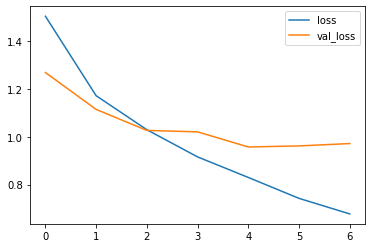

In [28]:
metrics[['loss', 'val_loss']].plot()

In [30]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9718363285064697, 0.6808000206947327]

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1000
           1       0.80      0.78      0.79      1000
           2       0.60      0.57      0.58      1000
           3       0.45      0.63      0.52      1000
           4       0.65      0.64      0.64      1000
           5       0.61      0.54      0.57      1000
           6       0.81      0.68      0.74      1000
           7       0.73      0.75      0.74      1000
           8       0.76      0.80      0.78      1000
           9       0.73      0.77      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



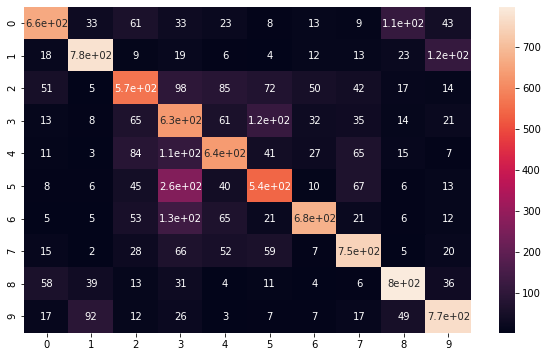

In [37]:
import seaborn as sns 

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [42]:
my_image= x_test[16]

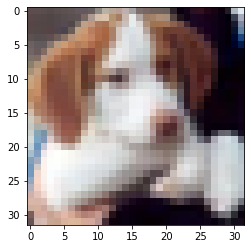

In [43]:
plt.imshow(my_image)

In [44]:
y_test[16]

array([5], dtype=uint8)

In [45]:
model.predict_classes(my_image.reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])